In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df = pd.read_csv("supermarket_sales.csv")

In [2]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
print(df['Customer type'].value_counts())
print("*"*40)
print(df['Branch'].value_counts())
print("*"*40)
print(df['City'].value_counts())
print("*"*40)
print(df['Product line'].value_counts())
print("*"*40)
print(df['Payment'].value_counts())
print("*"*40)
print(df.isnull().sum())
print("*"*40)

Member    501
Normal    499
Name: Customer type, dtype: int64
****************************************
A    340
B    332
C    328
Name: Branch, dtype: int64
****************************************
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
****************************************
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
****************************************
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64
****************************************
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date           

<Axes: xlabel='Unit price', ylabel='Rating'>

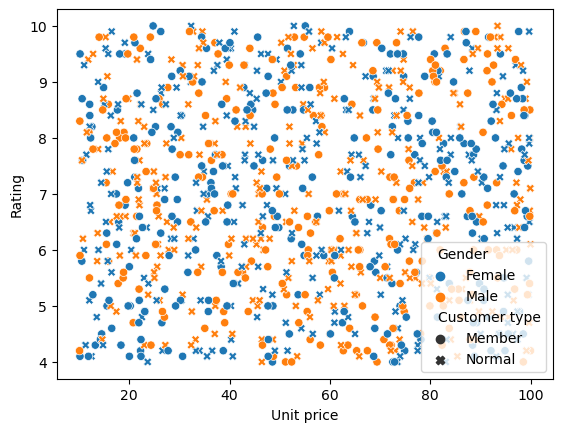

In [5]:
#Scatterplot
sns.scatterplot(data=df, x='Unit price', y='Rating',hue='Gender',style='Customer type')

<Axes: xlabel='Rating', ylabel='cogs'>

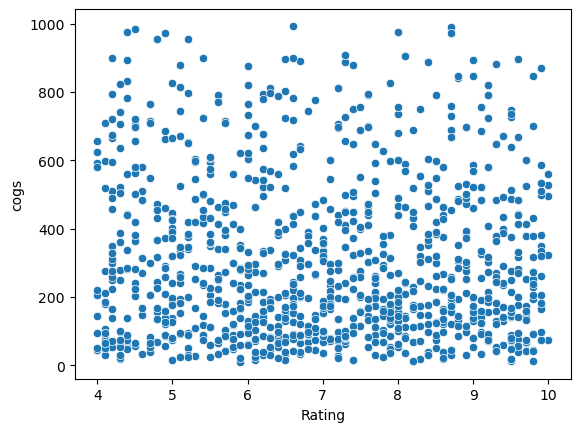

In [38]:
sns.scatterplot(x='Rating', y= 'cogs', data=df)

<Axes: xlabel='Total'>

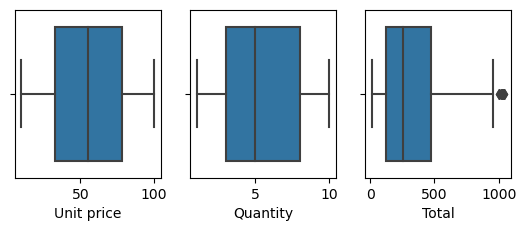

In [6]:
#Boxplot for Unit price, quantity, total
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=df)

<Axes: xlabel='gross income'>

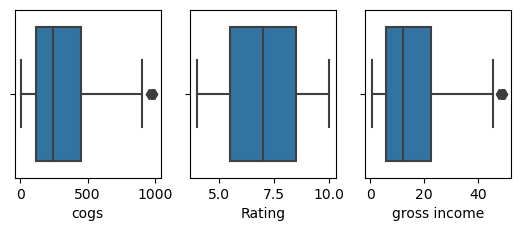

In [7]:
#Boxplot for cogs, rating, gross income
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=df)

<Axes: xlabel='Rating', ylabel='Unit price'>

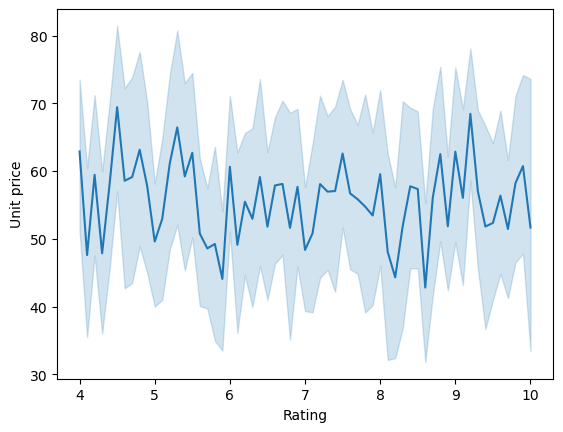

In [40]:
#generate Lineplot
sns.lineplot(x='Rating', y= 'Unit price', data=df)

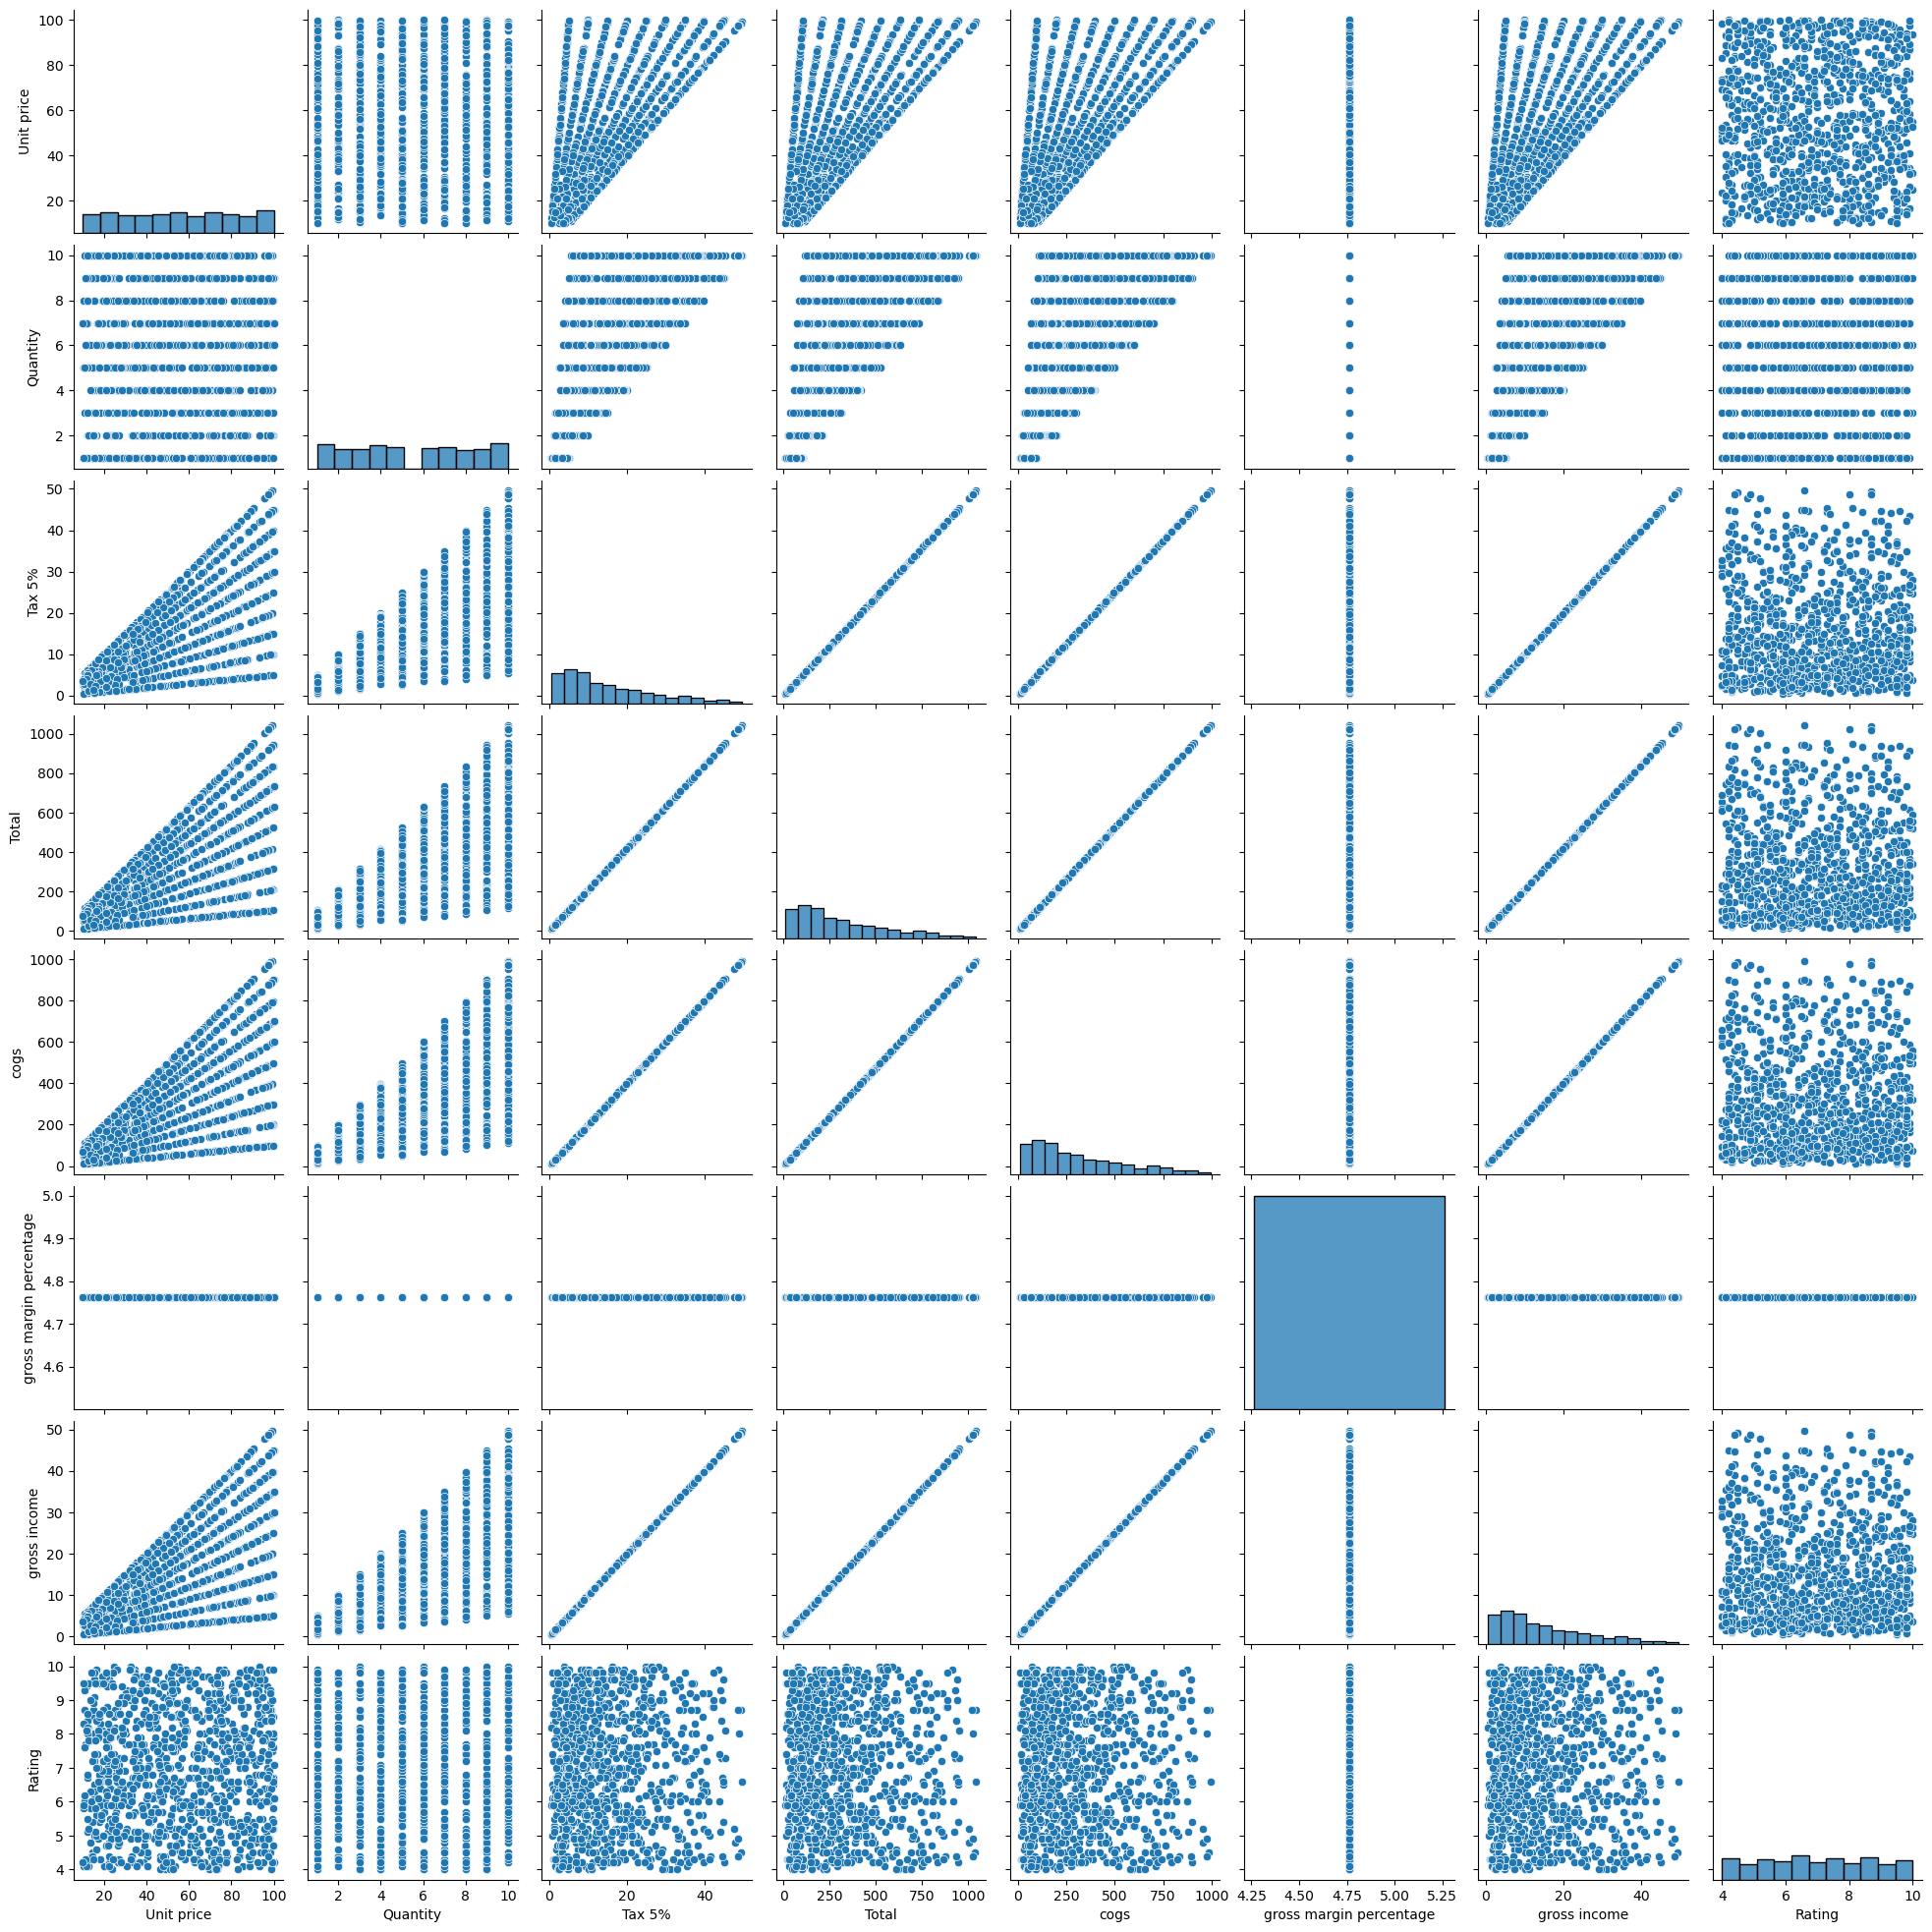

In [29]:
#pairplot generated
sns.pairplot(data=df)

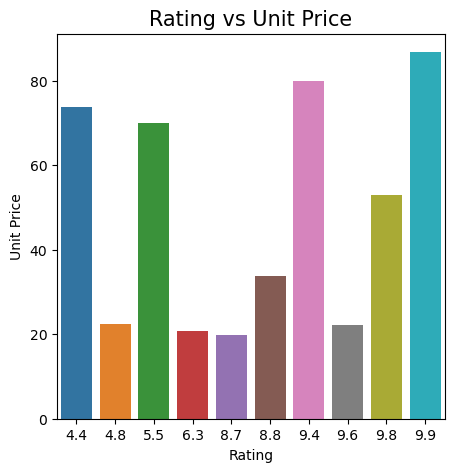

In [9]:
# Barplot - rating vs unit price
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=df[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

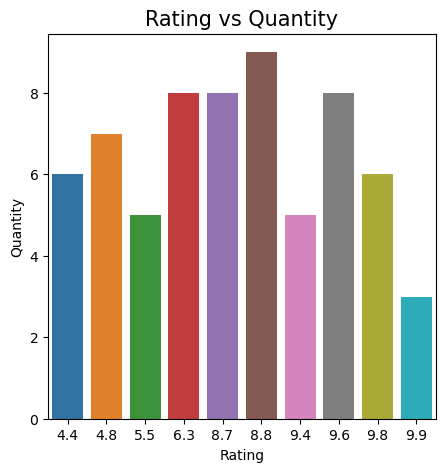

In [18]:
# Barplot - rating vs quantity
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=df[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

In [25]:
df.corr()

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Total                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000  1.000000   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.633962 -0.008778  
Quantity                                     NaN      0.705510 -0.015815  
Tax 5%                                       NaN      1.000000 -0.036442  
Total                                        NaN      1.000000 -0.036442  
cogs                                         NaN      1.000000 -0.036442  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.036442  
Rating                                       NaN     -0.036442  1.000000

<Axes: >

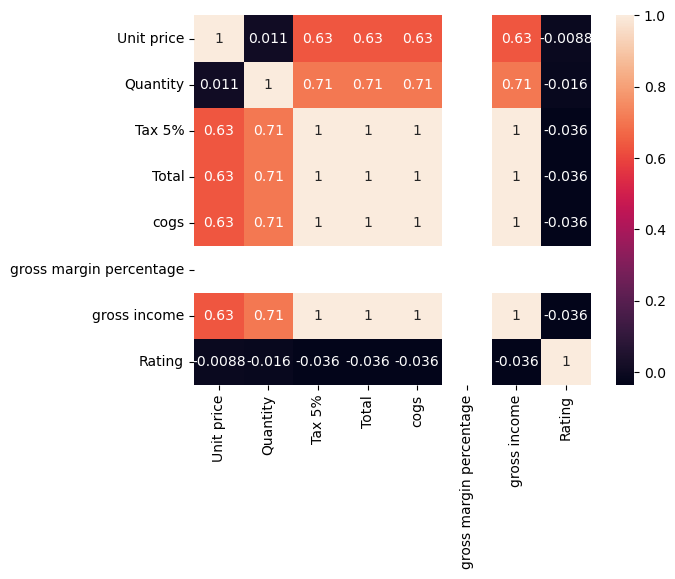

In [26]:
#generating heatmap
#plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot =True)

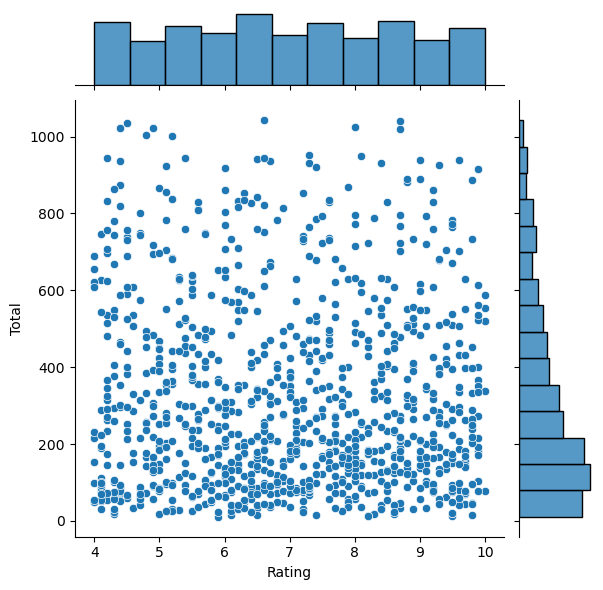

In [37]:
#generate Jointplot
sns.jointplot(x='Rating', y= 'Total', data=df)

In [58]:
def count_plot(x_axis, hue = None, rotation = 0):
    """
    1) input : x_axis, column name, data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = x_axis, data = df, hue = hue, order = df[x_axis].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
        
        
    plt.xticks(rotation = rotation)
    plt.show()  


In [59]:
def pie_plot(column_name):
    """
    1) input : column name, column data type must be object or categorical
    2) output : circle chart that shows size of each unique values and percentage 
    """
    plt.pie(df[column_name].value_counts(), labels = df[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.show()

In [72]:
def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.catplot(x = x_axis, y = y_axis, data = df, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

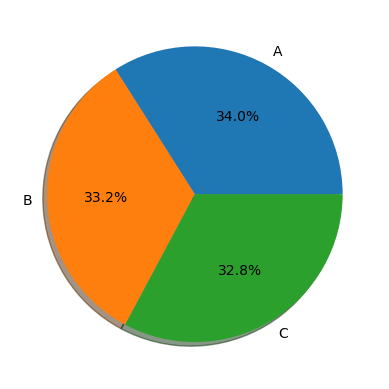

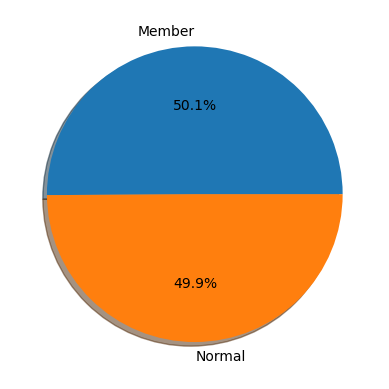

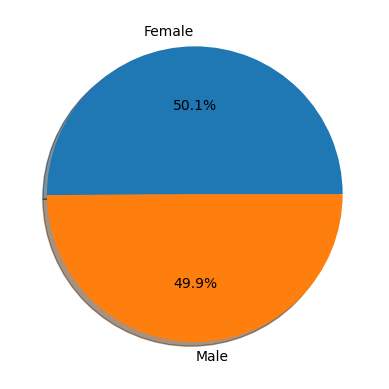

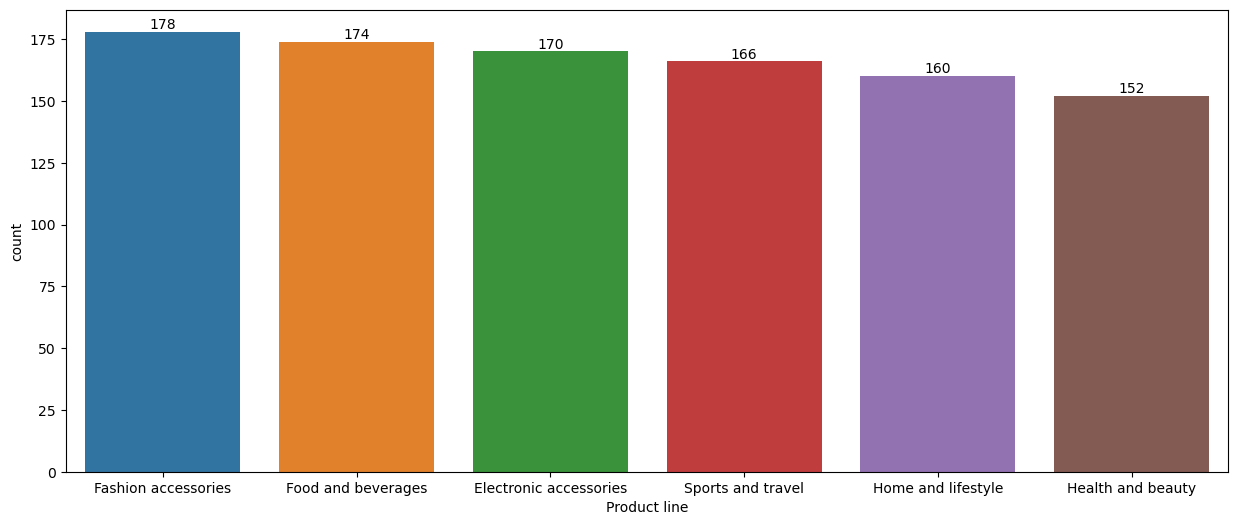

In [73]:
df["Branch"].unique()
pie_plot("Branch")

df["Customer type"].unique()
pie_plot("Customer type") 

df["Gender"].unique()
pie_plot("Gender")

df["Product line"].unique()
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot("Product line") 

We can see :

Most sales in branches is "Fashion accessories"
Lest sales in branches is "Health and beauty"

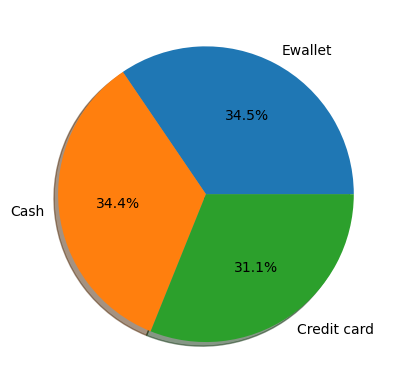

In [74]:
df["Payment"].unique()
pie_plot("Payment")

Customers prefered to Ewallet,cash payments

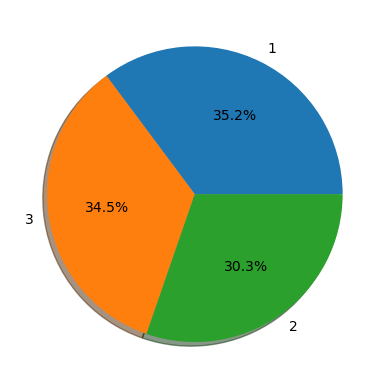

In [75]:
df["Month"].unique()
# number of unique values is small, which is appropriate with pie plot
pie_plot("Month")

Most sales in "january" month

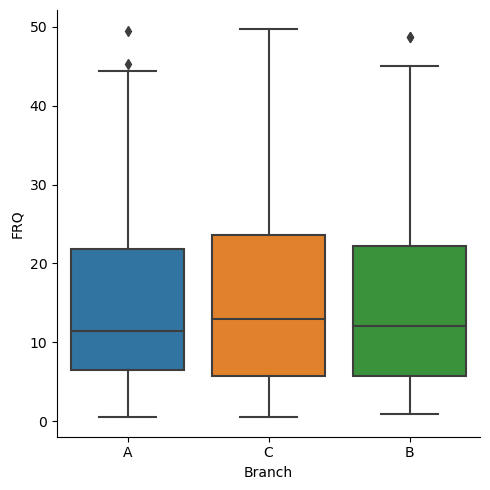

In [76]:
#What is Gross Income of each branch ?
box_plot(x_axis = "Branch", y_axis = "gross income")

Branch C stands out slightly with higher income compared to Branch A and B. Despite Branch A having slightly higher sales, it is Branch C that emerges as the most profitable branch in terms of gross income

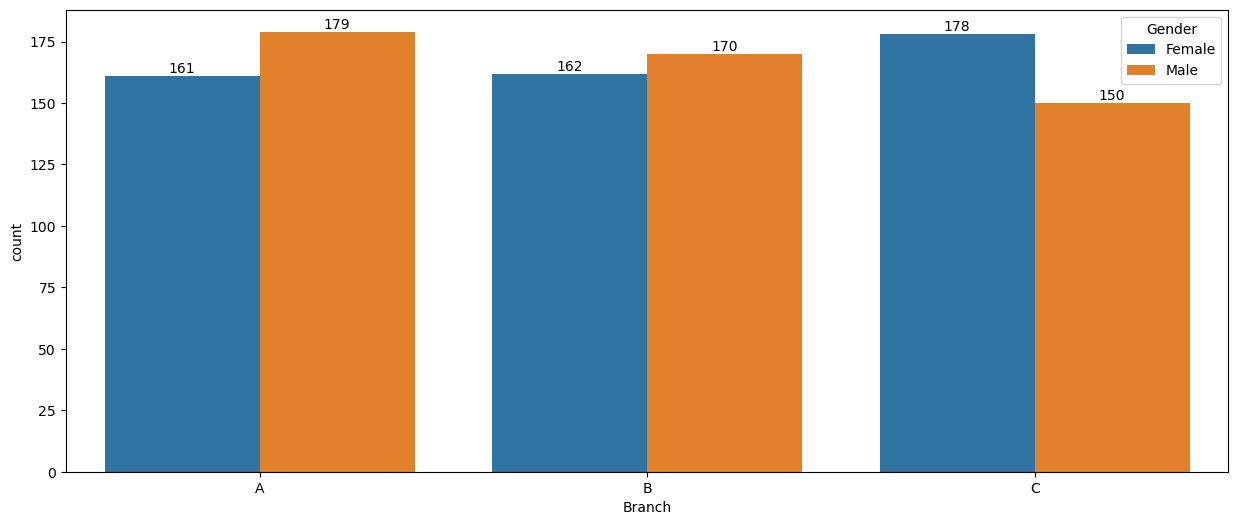

In [77]:
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot(x_axis = "Branch", hue = "Gender") 

Branch A,B has males greater than females, but branch C has females greater than males

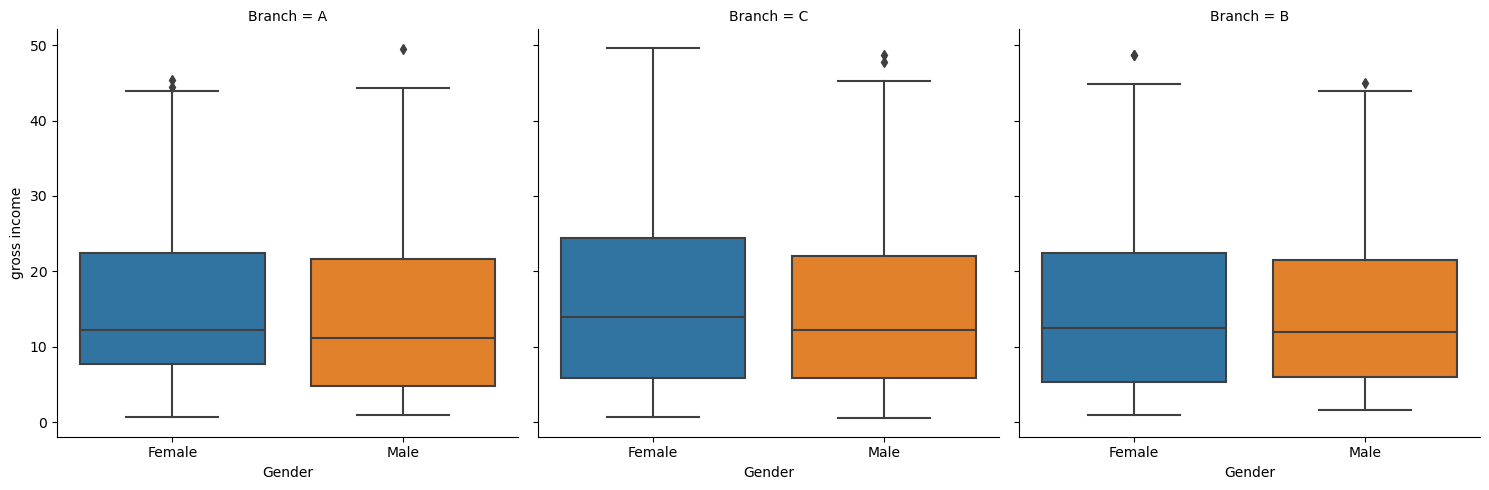

In [78]:
#What is male and female gross income in each branch ?
box_plot(x_axis = "Gender", y_axis = "gross income", col = "Branch")

"Female" gross income greater than Male in each branch

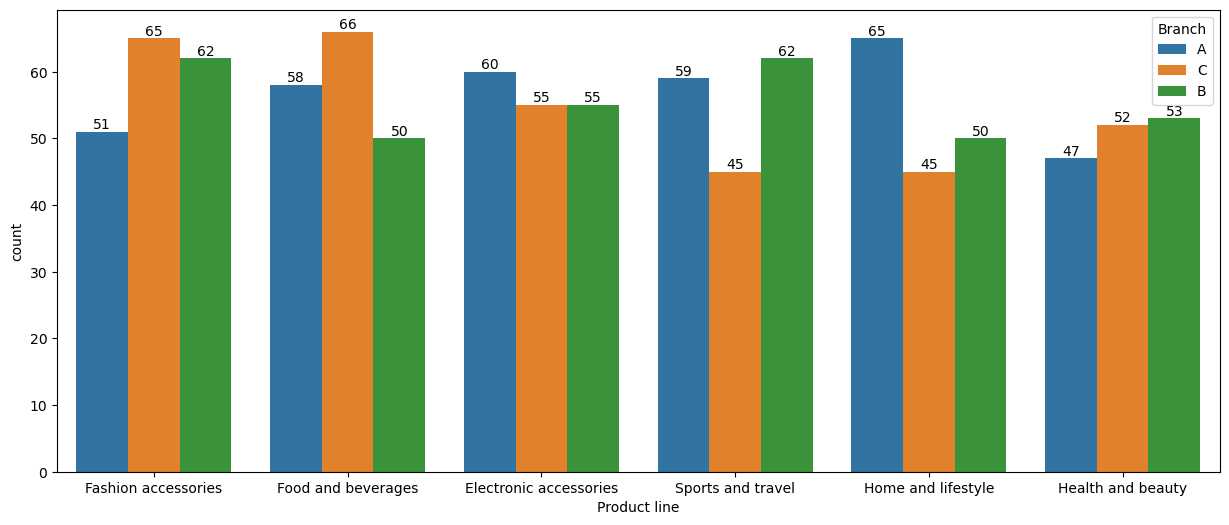

In [79]:
#See sales product line in branches
# first set figure size
plt.figure(figsize=(15,6))

# call function i create it in cell 10
count_plot(x_axis = "Product line", hue = "Branch")

"Electronic accessories", "Home and lifestyle" is the most sales in branch A
"Health and beauty", "Sports and travel" is the most sales in branch B
"Food and beverages", "Fashion accessories" is the most sales in branch C

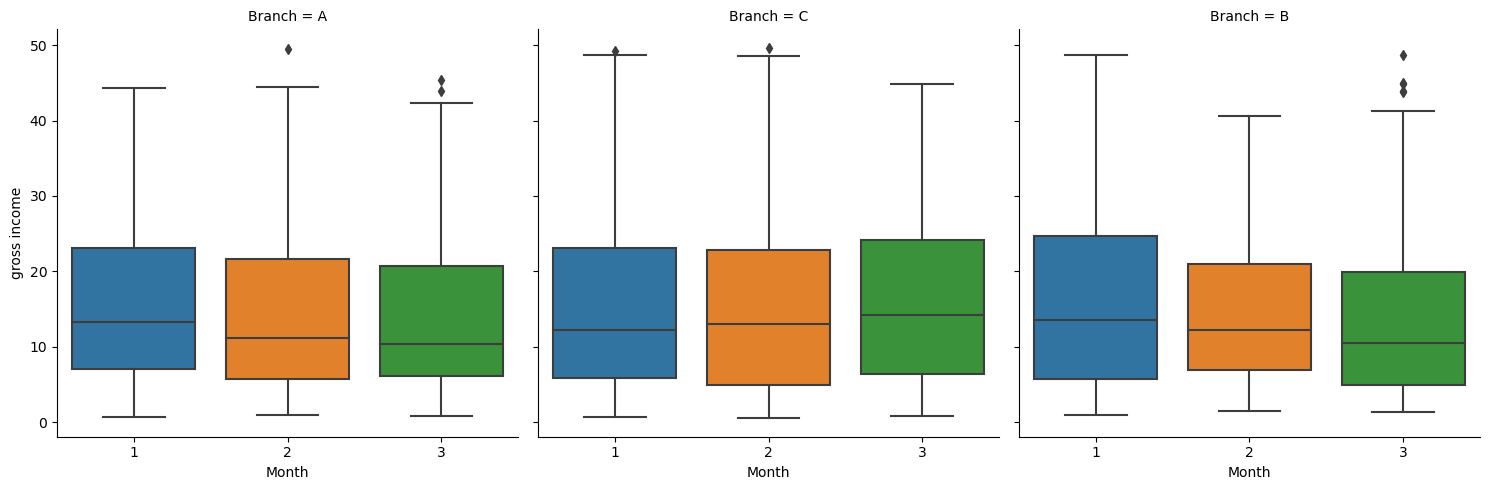

In [81]:
# What is month has greater gross income in each branch ?
box_plot(x_axis = "Month", y_axis = "gross income", col = "Branch")

"january" month has greater gross income

In [34]:
#list of categorical features
list_1=list(df.columns)
list_category=[]
for i in list_1:
    if df[i].dtype=='object':
        list_category.append(i)
label_encoder=LabelEncoder()
for i in list_category:
    df[i]=label_encoder.fit_transform(df[i])
df    

Invoice ID  Branch  City  Customer type  Gender  Product line  \
0           814       0     2              0       0             3   
1           142       2     1              1       0             0   
2           653       0     2              1       1             4   
3            18       0     2              0       1             3   
4           339       0     2              1       1             5   
..          ...     ...   ...            ...     ...           ...   
995         153       2     1              1       1             3   
996         250       1     0              1       0             4   
997         767       0     2              0       1             2   
998         308       0     2              1       1             4   
999         935       0     2              0       0             1   

     Unit price  Quantity   Tax 5%      Total  Date  Time  Payment    cogs  \
0         74.69         7  26.1415   548.9715    26   146        2  522.83   
1         15.28         5   3.8200    80.2200    87    23        0   76.40   
2         46.33         7  16.2155   340.5255    81   155        1  324.31   
3         58.22         8  23.2880   489.0480    19   485        2  465.76   
4         86.31         7  30.2085   634.3785    57    29        2  604.17   
..          ...       ...      ...        ...   ...   ...      ...     ...   
995       40.35         1   2.0175    42.3675    21   174        2   40.35   
996       97.38        10  48.6900  1022.4900    70   342        2  973.80   
997       31.84         1   1.5920    33.4320    58   154        0   31.84   
998       65.82         1   3.2910    69.1110    45   261        0   65.82   
999       88.34         7  30.9190   649.2990    40   160        0  618.38   

     gross margin percentage  gross income  Rating  
0                   4.761905       26.1415     9.1  
1                   4.761905        3.8200     9.6  
2                   4.761905       16.2155     7.4  
3                   4.761905       23.2880     8.4  
4                   4.761905       30.2085     5.3  
..                       ...           ...     ...  
995                 4.761905        2.0175     6.2  
996                 4.761905       48.6900     4.4  
997                 4.761905        1.5920     7.7  
998                 4.761905        3.2910     4.1  
999                 4.761905       30.9190     6.6  

[1000 rows x 17 columns]

In [35]:
#Split Data into Training And Testing Datasets
#drop gender column
y=df['Gender']
x=df.drop('Gender',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [48]:
#Implementing the Naive Bayes Classifier Model
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.35      0.41       100
           1       0.50      0.66      0.57       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.49       200
weighted avg       0.51      0.51      0.49       200

Confusion Matrix:
 [[35 65]
 [34 66]]
Training Score:
 55.125


In [33]:
#Implementing the Random Forest Classifier Model
random_forest_classifier=RandomForestClassifier()
random_forest_classifier.fit(x_train,y_train)

y_pred=random_forest_classifier.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",random_forest_classifier.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52       100
           1       0.49      0.45      0.47       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

Confusion Matrix:
 [[54 46]
 [55 45]]
Training Score:
 100.0


In [45]:
#Implementing the Random Gradient Boost Classifier Model
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.48      0.48       100
           1       0.47      0.46      0.46       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix:
 [[48 52]
 [54 46]]
Training Score:
 88.75


In [44]:
#Implementing the Decision Tree Classifier Model
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.79      0.63       100
           1       0.56      0.27      0.36       100

    accuracy                           0.53       200
   macro avg       0.54      0.53      0.50       200
weighted avg       0.54      0.53      0.50       200

Confusion Matrix:
 [[79 21]
 [73 27]]
Training Score:
 63.87500000000001


In [ ]:
#The Random Classifier Model gives the best training score of 100.0

In [49]:
#Generate item_cnt_month result using above model
test_df = test.copy()
test_df['year'] = '2015'
test_df['month'] = '11'
result_rf = random_model.predict(test_df[['year','month','shop_id','item_id']])
result_rf_df = pd.DataFrame(result_rf)
final_result = pd.merge(test_df, result_rf_df, left_index=True, right_index=True)
final_result = final_result.rename(columns={0:'item_cnt_month'})
final_result = final_result[['ID','item_cnt_month']]
final_result.shape

NameError: name 'test' is not defined